<a href="https://colab.research.google.com/github/sejuti009/Welcome-To-Data-Science-/blob/main/Copy_of_DSCM22L6A1_Digit_Recognizer_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Import Libraries**

In [ ]:
# Import Libraries
import keras
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

### **2. Import Dataset**

In [ ]:
# Load Dataset and split it into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Let's check shape of different datasets
print("Train Dataset (x) :", x_train.shape)
print("Train Dataset (y) :", y_train.shape)
print("Test Dataset (x) :", x_test.shape)
print("Test Dataset (y) :", y_test.shape)

Train Dataset (x) : (60000, 28, 28)
Train Dataset (y) : (60000,)
Test Dataset (x) : (10000, 28, 28)
Test Dataset (y) : (10000,)


### Let's Understand these dimensions here -

- It is a dataset of 60,000 small squares
- 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

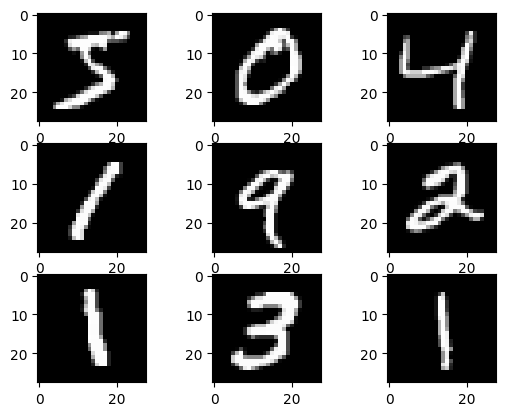

In [ ]:
# Let's check few images of this dataset
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

### **3. Preprocess this dataset**

- The image data cannot be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network.
- The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [ ]:
# Let's reshape the training and testing data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize to range 0-1
x_train /= 255
x_test /= 255

# Let's check normalized images
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### **4. Model Building**

In [ ]:
# Set values for major parameters for model training
batch_size = 128
num_classes = 10
epochs = 10

# Building Models
# Adding layers one by one
# Since this is a classification problem -
# activation function for hidden layer - relu
# activation function for output layer - softmax
# Input shape (since grayscale) - (28,28,1)
# Output shape - 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Model Compilation
# This is a multi class classification problem
# thus loss function - categorical cross entropy and metrics as accuracy
# Optimizer being used is SGD (Stochastic Gradient Descent)
# lr stands for learning rate
opt = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **5. Model Training**

In [ ]:
# Fit dataset into model
# Save the model as well after training
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.6388 - loss: 1.4934 - val_accuracy: 0.9027 - val_loss: 0.3583
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.8988 - loss: 0.3539 - val_accuracy: 0.9183 - val_loss: 0.2873
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9177 - loss: 0.2859 - val_accuracy: 0.9304 - val_loss: 0.2409
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9272 - loss: 0.2514 - val_accuracy: 0.9400 - val_loss: 0.2155
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9356 - loss: 0.2221 - val_accuracy: 0.9436 - val_loss: 0.1989
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9432 - loss: 0.1986 - val_accuracy: 0.9492 - val_loss: 0.1773
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9460 - loss: 0.1853 - val_accuracy: 0.9526 - val_loss: 0.1665
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9518 - loss: 0.1675 - 

The model has successfully trained
Saving the model as mnist.h5


### **6. Model Evaluation**

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13273198902606964
Test accuracy: 0.9617000222206116


### **7. Digit Recognition using this model**

In [ ]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from google.colab import files

file = files.upload()

Saving 7.webp to 7.webp


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

def load_image(filename):
    img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype("float32") / 255.0
    return img


In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('7.webp')
	# load model
	model = load_model('mnist.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)


In [ ]:
# entry point, run the example
run_example()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
5
